In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import make_regression

In [4]:
#Importing CSV file into pandas df
abnb_full = pd.read_csv('listings.csv')
abnb_full.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,16228948,https://www.airbnb.com/rooms/16228948,20170502172350,2017-05-03,Robert Ranch in Los Angeles for filming/wedding,Stunning Ranch Estate situated on 20 acres and...,NaN,Stunning Ranch Estate situated on 20 acres and...,none,NaN,...,NaN,f,NaN,NaN,t,strict,f,f,1,NaN
1,8909380,https://www.airbnb.com/rooms/8909380,20170502172350,2017-05-03,Nice quiet private ranch house,NaN,Very private and quite . Hiking horse riding a...,Very private and quite . Hiking horse riding a...,none,I'm in the country what's not to love about that,...,9.0,f,NaN,NaN,f,flexible,f,f,1,1.91
2,14078522,https://www.airbnb.com/rooms/14078522,20170502172350,2017-05-03,Room w/private bath on Small Ranch,My place is close to Six Flags Magic Mountain ...,Room with queen bed and private bath,My place is close to Six Flags Magic Mountain ...,none,Horse area. Trails for hiking and riding. Quie...,...,10.0,f,NaN,NaN,f,flexible,f,f,1,1.72
3,13006928,https://www.airbnb.com/rooms/13006928,20170502172350,2017-05-03,Miller Ranch Bunkhouse,"Our place is close to great views, equestrian ...",Please know that we live on a dirt road but it...,"Our place is close to great views, equestrian ...",none,NaN,...,10.0,f,NaN,NaN,t,flexible,f,f,1,2.12
4,7898757,https://www.airbnb.com/rooms/7898757,20170502172350,2017-05-03,Studio with full bathroom,Fully furnished studio only a 10 min drive fro...,NaN,Fully furnished studio only a 10 min drive fro...,none,NaN,...,10.0,f,NaN,"City of Los Angeles, CA",f,flexible,f,f,1,0.18


In [5]:
abnb_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31253 entries, 0 to 31252
Data columns (total 95 columns):
id                                  31253 non-null int64
listing_url                         31253 non-null object
scrape_id                           31253 non-null int64
last_scraped                        31253 non-null object
name                                31246 non-null object
summary                             30417 non-null object
space                               21866 non-null object
description                         31238 non-null object
experiences_offered                 31253 non-null object
neighborhood_overview               18575 non-null object
notes                               13815 non-null object
transit                             18164 non-null object
access                              19074 non-null object
interaction                         18262 non-null object
house_rules                         22047 non-null object
thumbnail_url          

In [6]:
abnb_full.describe()

,id,scrape_id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3.125300e+04,3.125300e+04,3.125300e+04,0.0,31239.000000,31239.000000,0.0,31253.000000,31253.000000,31253.000000,...,31253.000000,23726.000000,23689.000000,23688.000000,23661.000000,23690.000000,23660.000000,23648.000000,31253.000000,24030.000000
mean,1.085829e+07,2.017050e+13,3.632524e+07,NaN,5.171132,5.171132,NaN,34.056220,-118.334252,3.425751,...,20.842543,94.214533,9.612394,9.416456,9.770297,9.768974,9.612933,9.485411,3.546572,1.857360
std,5.527237e+06,3.531306e+00,3.454658e+07,NaN,24.143834,24.143834,NaN,0.101912,0.153783,2.481926,...,38.106641,8.040304,0.789394,0.954680,0.652473,0.658068,0.735289,0.834739,5.551354,2.022831
min,1.090000e+02,2.017050e+13,5.900000e+01,NaN,0.000000,0.000000,NaN,33.338905,-118.911026,1.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,6.262191e+06,2.017050e+13,7.441819e+06,NaN,1.000000,1.000000,NaN,34.013997,-118.431313,2.000000,...,1.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.410000
50%,1.216199e+07,2.017050e+13,2.471631e+07,NaN,2.000000,2.000000,NaN,34.066607,-118.349465,2.000000,...,6.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.120000
75%,1.570678e+07,2.017050e+13,5.623875e+07,NaN,4.000000,4.000000,NaN,34.103960,-118.267693,4.000000,...,23.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,2.730000
max,1.852404e+07,2.017050e+13,1.285513e+08,NaN,855.000000,855.000000,NaN,34.742088,-117.655471,16.000000,...,605.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,49.000000,90.000000


In [7]:
#create csv file for cleaning
abnb = pd.read_csv('clean_listings.csv')
abnb.head()


,Unnamed: 0,id,name,host_id,host_name,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews,last_review,reviews_per_month
0,0,16228948,Robert Ranch in Los Angeles for filming/wedding,54345288,Robert,1.0,Acton,NaN,34.530350,-118.227088,Entire home/apt,3000,1,352,0,NaN,NaN
1,1,8909380,Nice quiet private ranch house,44800067,Kevin,1.0,Acton,NaN,34.485431,-118.125379,Private room,50,1,350,33,4/22/2017,1.91
2,2,14078522,Room w/private bath on Small Ranch,84615808,Kirsten,1.0,Acton,NaN,34.510130,-118.212407,Private room,55,1,348,14,4/29/2017,1.72
3,3,13006928,Miller Ranch Bunkhouse,71743973,Beverly,1.0,Acton,NaN,34.515486,-118.230742,Entire home/apt,150,1,87,22,4/30/2017,2.12
4,4,7898757,Studio with full bathroom,41646908,Ian,1.0,Adams-Normandie,NaN,34.031419,-118.299017,Private room,30,1,0,3,12/26/2015,0.18


In [8]:
abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31253 entries, 0 to 31252
Data columns (total 17 columns):
Unnamed: 0                      31253 non-null int64
id                              31253 non-null int64
name                            31246 non-null object
host_id                         31253 non-null int64
host_name                       31239 non-null object
host_listings_count             31239 non-null float64
neighbourhood_cleansed          31253 non-null object
neighbourhood_group_cleansed    0 non-null float64
latitude                        31253 non-null float64
longitude                       31253 non-null float64
room_type                       31253 non-null object
price                           31253 non-null int64
minimum_nights                  31253 non-null int64
availability_365                31253 non-null int64
number_of_reviews               31253 non-null int64
last_review                     24044 non-null object
reviews_per_month               24

In [9]:
abnb.describe()

,Unnamed: 0,id,host_id,host_listings_count,neighbourhood_group_cleansed,latitude,longitude,price,minimum_nights,availability_365,number_of_reviews,reviews_per_month
count,31253.000000,3.125300e+04,3.125300e+04,31239.000000,0.0,31253.000000,31253.000000,31253.000000,31253.000000,31253.000000,31253.000000,24030.000000
mean,15626.000000,1.085829e+07,3.632524e+07,5.171132,NaN,34.056220,-118.334252,180.094039,3.208460,199.351358,20.842543,1.857360
std,9022.108318,5.527237e+06,3.454658e+07,24.143834,NaN,0.101912,0.153783,418.502140,8.169057,138.546709,38.106641,2.022831
min,0.000000,1.090000e+02,5.900000e+01,0.000000,NaN,33.338905,-118.911026,10.000000,1.000000,0.000000,0.000000,0.020000
25%,7813.000000,6.262191e+06,7.441819e+06,1.000000,NaN,34.013997,-118.431313,69.000000,1.000000,68.000000,1.000000,0.410000
50%,15626.000000,1.216199e+07,2.471631e+07,2.000000,NaN,34.066607,-118.349465,100.000000,2.000000,208.000000,6.000000,1.120000
75%,23439.000000,1.570678e+07,5.623875e+07,4.000000,NaN,34.103960,-118.267693,170.000000,3.000000,341.000000,23.000000,2.730000
max,31252.000000,1.852404e+07,1.285513e+08,855.000000,NaN,34.742088,-117.655471,10000.000000,365.000000,365.000000,605.000000,90.000000


In [10]:
abnb_df = pd.DataFrame(abnb)

In [12]:
abnb_df = abnb_df.sort_values(by=['price'])
abnb_df.head()

,Unnamed: 0,id,name,host_id,host_name,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews,last_review,reviews_per_month
22284,22284,17861038,Store Ur Luggage 2 LA,49379348,Shylise,8.0,Vermont Square,NaN,33.997144,-118.298321,Shared room,10,1,365,0,NaN,NaN
21997,21997,16345911,apartment,67192746,Jacqueline,1.0,Van Nuys,NaN,34.199755,-118.449201,Private room,10,1,0,0,NaN,NaN
28687,28687,16686971,LAX Luggage Storage: Not for Sleep,54558297,Arlene,1.0,Westchester,NaN,33.976647,-118.386671,Shared room,10,1,71,3,3/29/2017,1.45
13866,13866,9936812,Nice couch and extra comfort chair,51072712,Hailey,1.0,La Habra Heights,NaN,33.956903,-117.971333,Shared room,10,1,0,0,NaN,NaN
5340,5340,17981816,TEST!!!!,63832917,Minxiang,1.0,Hollywood,NaN,34.097784,-118.325798,Entire home/apt,10,1,0,0,NaN,NaN


In [56]:
abnb_df = abnb_df.rename(columns={'neighbourhood_cleansed': 'neighbourhood', 'neighbourhood_group_cleansed': 'neighbourhood'})

In [57]:
inserted_cols = ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'related_host_listings_count', 'availability_365']
cols = ([col for col in inserted_cols if col in abnb_df] 
        + [col for col in abnb_df if col not in inserted_cols])
abnb_df = abnb_df[cols]
abnb_df.head()

,id,name,host_id,host_name,neighbourhood,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,Unnamed: 0,host_listings_count
22284,17861038,Store Ur Luggage 2 LA,49379348,Shylise,Vermont Square,NaN,33.997144,-118.298321,Shared room,10,1,0,NaN,NaN,365,22284,8.0
21997,16345911,apartment,67192746,Jacqueline,Van Nuys,NaN,34.199755,-118.449201,Private room,10,1,0,NaN,NaN,0,21997,1.0
28687,16686971,LAX Luggage Storage: Not for Sleep,54558297,Arlene,Westchester,NaN,33.976647,-118.386671,Shared room,10,1,3,3/29/2017,1.45,71,28687,1.0
13866,9936812,Nice couch and extra comfort chair,51072712,Hailey,La Habra Heights,NaN,33.956903,-117.971333,Shared room,10,1,0,NaN,NaN,0,13866,1.0
5340,17981816,TEST!!!!,63832917,Minxiang,Hollywood,NaN,34.097784,-118.325798,Entire home/apt,10,1,0,NaN,NaN,0,5340,1.0


In [58]:
abnb_df['price'] = abnb_df['price'].astype(np.int64)

abnb_df.dtypes

id                       int64
name                    object
host_id                  int64
host_name               object
neighbourhood           object
neighbourhood          float64
latitude               float64
longitude              float64
room_type               object
price                    int64
minimum_nights           int64
number_of_reviews        int64
last_review             object
reviews_per_month      float64
availability_365         int64
Unnamed: 0               int64
host_listings_count    float64
dtype: object

In [59]:
abnb_df_corr = abnb_df.corr()
abnb_df_corr

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Unnamed: 0,host_listings_count
id,1.000000,0.572152,NaN,-0.009050,0.091964,-0.002185,-0.078630,-0.406059,0.197155,-0.139137,-0.030232,0.048575
host_id,0.572152,1.000000,NaN,-0.023192,0.115975,-0.003804,-0.067614,-0.230989,0.146275,-0.040745,-0.028481,-0.011867
neighbourhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,-0.009050,-0.023192,NaN,1.000000,-0.103742,0.002498,-0.022966,-0.038900,-0.039123,0.018138,-0.078256,-0.014921
longitude,0.091964,0.115975,NaN,-0.103742,1.000000,-0.147868,-0.038765,-0.052414,0.003292,0.016839,-0.221875,-0.017840
price,-0.002185,-0.003804,NaN,0.002498,-0.147868,1.000000,0.027164,-0.061077,-0.092354,0.070091,-0.002451,0.031296
minimum_nights,-0.078630,-0.067614,NaN,-0.022966,-0.038765,0.027164,1.000000,-0.057634,-0.121844,0.012536,0.013809,0.001191
number_of_reviews,-0.406059,-0.230989,NaN,-0.038900,-0.052414,-0.061077,-0.057634,1.000000,0.548770,0.105862,0.025687,-0.018674
reviews_per_month,0.197155,0.146275,NaN,-0.039123,0.003292,-0.092354,-0.121844,0.548770,1.000000,-0.018063,-0.005468,-0.013185
availability_365,-0.139137,-0.040745,NaN,0.018138,0.016839,0.070091,0.012536,0.105862,-0.018063,1.000000,-0.009029,0.038254


In [60]:
abnb_nrows = len(abnb_df.index)

abnb_df_50 = abnb_df.iloc[round(abnb_nrows*.25):round(abnb_nrows*.75)]
abnb_df_50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15627 entries, 5578 to 30082
Data columns (total 17 columns):
id                     15627 non-null int64
name                   15623 non-null object
host_id                15627 non-null int64
host_name              15620 non-null object
neighbourhood          15627 non-null object
neighbourhood          0 non-null float64
latitude               15627 non-null float64
longitude              15627 non-null float64
room_type              15627 non-null object
price                  15627 non-null int64
minimum_nights         15627 non-null int64
number_of_reviews      15627 non-null int64
last_review            12363 non-null object
reviews_per_month      12355 non-null float64
availability_365       15627 non-null int64
Unnamed: 0             15627 non-null int64
host_listings_count    15620 non-null float64
dtypes: float64(5), int64(7), object(5)
memory usage: 2.1+ MB


In [61]:
abnb_df_50_describe = abnb_df_50.describe()
abnb_df_50_describe

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Unnamed: 0,host_listings_count
count,1.562700e+04,1.562700e+04,0.0,15627.000000,15627.000000,15627.000000,15627.000000,15627.000000,12355.000000,15627.000000,15627.000000,15620.000000
mean,1.048886e+07,3.354367e+07,NaN,34.056982,-118.337690,108.607794,3.080502,25.307993,2.038076,190.660651,15557.083061,3.972983
std,5.606824e+06,3.332328e+07,NaN,0.096045,0.134975,27.182960,7.578628,44.707441,2.189526,138.323411,9031.996955,18.584813
min,1.090000e+02,5.900000e+01,NaN,33.339002,-118.911026,69.000000,1.000000,0.000000,0.020000,0.000000,3.000000,0.000000
25%,5.670594e+06,6.658533e+06,NaN,34.021203,-118.425956,85.000000,1.000000,1.000000,0.460000,59.000000,7434.500000,1.000000
50%,1.155148e+07,2.160481e+07,NaN,34.070665,-118.348750,100.000000,2.000000,7.000000,1.300000,179.000000,15287.000000,1.000000
75%,1.550266e+07,5.085364e+07,NaN,34.103415,-118.272107,129.000000,3.000000,29.000000,3.060000,334.000000,23560.500000,3.000000
max,1.852156e+07,1.284805e+08,NaN,34.709307,-117.697582,170.000000,365.000000,605.000000,90.000000,365.000000,31248.000000,632.000000


In [62]:
abnb_df_50_corr = abnb_df_50.corr()
abnb_df_50_corr

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Unnamed: 0,host_listings_count
id,1.000000,0.559687,NaN,-0.027214,0.074297,-0.000680,-0.086358,-0.423100,0.165096,-0.156642,-0.020726,0.038076
host_id,0.559687,1.000000,NaN,-0.027165,0.073009,-0.009201,-0.066841,-0.238716,0.120184,-0.039698,-0.018029,-0.026612
neighbourhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,-0.027214,-0.027165,NaN,1.000000,-0.097661,-0.036093,-0.016814,-0.040483,-0.039611,0.033076,-0.098253,-0.011412
longitude,0.074297,0.073009,NaN,-0.097661,1.000000,-0.074679,-0.017661,-0.073928,-0.020061,0.018022,-0.260423,-0.007907
price,-0.000680,-0.009201,NaN,-0.036093,-0.074679,1.000000,0.026665,0.018023,0.007875,0.021909,0.038971,0.039018
minimum_nights,-0.086358,-0.066841,NaN,-0.016814,-0.017661,0.026665,1.000000,-0.059864,-0.124660,0.006417,0.015353,-0.001689
number_of_reviews,-0.423100,-0.238716,NaN,-0.040483,-0.073928,0.018023,-0.059864,1.000000,0.541055,0.127284,0.040460,-0.006525
reviews_per_month,0.165096,0.120184,NaN,-0.039611,-0.020061,0.007875,-0.124660,0.541055,1.000000,0.009635,0.019049,-0.011482
availability_365,-0.156642,-0.039698,NaN,0.033076,0.018022,0.021909,0.006417,0.127284,0.009635,1.000000,-0.006821,0.026077


In [63]:
abnb_df_80 = abnb_df.iloc[round(abnb_nrows*.1):round(abnb_nrows*.9)]
abnb_df_80.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25003 entries, 18753 to 24844
Data columns (total 17 columns):
id                     25003 non-null int64
name                   24998 non-null object
host_id                25003 non-null int64
host_name              24990 non-null object
neighbourhood          25003 non-null object
neighbourhood          0 non-null float64
latitude               25003 non-null float64
longitude              25003 non-null float64
room_type              25003 non-null object
price                  25003 non-null int64
minimum_nights         25003 non-null int64
number_of_reviews      25003 non-null int64
last_review            19686 non-null object
reviews_per_month      19674 non-null float64
availability_365       25003 non-null int64
Unnamed: 0             25003 non-null int64
host_listings_count    24990 non-null float64
dtypes: float64(5), int64(7), object(5)
memory usage: 3.4+ MB


In [64]:
abnb_df_80_describe = abnb_df_80.describe()
abnb_df_80_describe

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Unnamed: 0,host_listings_count
count,2.500300e+04,2.500300e+04,0.0,25003.000000,25003.000000,25003.000000,25003.000000,25003.000000,19674.000000,25003.000000,25003.000000,24990.000000
mean,1.065516e+07,3.464181e+07,NaN,34.056960,-118.334978,119.699796,3.127025,23.162261,1.942014,195.029836,15678.301964,4.530972
std,5.549653e+06,3.365095e+07,NaN,0.099084,0.143542,57.909320,7.660322,40.927216,2.085794,138.240260,9019.385345,23.033749
min,1.090000e+02,5.900000e+01,NaN,33.339002,-118.911026,46.000000,1.000000,0.000000,0.020000,0.000000,1.000000,0.000000
25%,6.006257e+06,6.906312e+06,NaN,34.016904,-118.428477,75.000000,1.000000,1.000000,0.430000,63.000000,7753.500000,1.000000
50%,1.182765e+07,2.320543e+07,NaN,34.068413,-118.348995,100.000000,2.000000,7.000000,1.200000,183.000000,15584.000000,1.000000
75%,1.553802e+07,5.272624e+07,NaN,34.103971,-118.267731,150.000000,3.000000,27.000000,2.890000,336.000000,23538.500000,3.000000
max,1.852404e+07,1.284805e+08,NaN,34.742088,-117.697582,299.000000,365.000000,605.000000,90.000000,365.000000,31251.000000,855.000000


In [65]:
abnb_df_80_corr = abnb_df_80.corr()
abnb_df_80_corr

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Unnamed: 0,host_listings_count
id,1.000000,0.561710,NaN,-0.012600,0.072405,-0.022970,-0.077047,-0.416664,0.184094,-0.145377,-0.019164,0.041486
host_id,0.561710,1.000000,NaN,-0.024082,0.092212,-0.046291,-0.061783,-0.234433,0.131787,-0.037543,-0.018911,-0.019596
neighbourhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,-0.012600,-0.024082,NaN,1.000000,-0.110886,-0.053936,-0.021439,-0.042959,-0.042176,0.015271,-0.083894,-0.013003
longitude,0.072405,0.092212,NaN,-0.110886,1.000000,-0.140216,-0.025491,-0.065853,-0.018150,0.031847,-0.253635,-0.006459
price,-0.022970,-0.046291,NaN,-0.053936,-0.140216,1.000000,0.044588,-0.017852,-0.048264,0.040362,0.055694,0.068399
minimum_nights,-0.077047,-0.061783,NaN,-0.021439,-0.025491,0.044588,1.000000,-0.059791,-0.127314,0.010334,0.011961,0.005037
number_of_reviews,-0.416664,-0.234433,NaN,-0.042959,-0.065853,-0.017852,-0.059791,1.000000,0.549098,0.119996,0.026741,-0.010831
reviews_per_month,0.184094,0.131787,NaN,-0.042176,-0.018150,-0.048264,-0.127314,0.549098,1.000000,-0.000670,0.000112,-0.009336
availability_365,-0.145377,-0.037543,NaN,0.015271,0.031847,0.040362,0.010334,0.119996,-0.000670,1.000000,0.000482,0.032388


In [66]:
abnb_df_90 = abnb_df.iloc[round(abnb_nrows*.05):round(abnb_nrows*.95)]
abnb_df_90.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28127 entries, 29847 to 27270
Data columns (total 17 columns):
id                     28127 non-null int64
name                   28120 non-null object
host_id                28127 non-null int64
host_name              28113 non-null object
neighbourhood          28127 non-null object
neighbourhood          0 non-null float64
latitude               28127 non-null float64
longitude              28127 non-null float64
room_type              28127 non-null object
price                  28127 non-null int64
minimum_nights         28127 non-null int64
number_of_reviews      28127 non-null int64
last_review            22037 non-null object
reviews_per_month      22024 non-null float64
availability_365       28127 non-null int64
Unnamed: 0             28127 non-null int64
host_listings_count    28113 non-null float64
dtypes: float64(5), int64(7), object(5)
memory usage: 3.9+ MB


In [67]:
abnb_df_90_describe = abnb_df_90.describe()
abnb_df_90_describe

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Unnamed: 0,host_listings_count
count,2.812700e+04,2.812700e+04,0.0,28127.000000,28127.000000,28127.000000,28127.000000,28127.000000,22024.000000,28127.000000,28127.00000,28113.000000
mean,1.070253e+07,3.520410e+07,NaN,34.056512,-118.333256,128.805667,3.155651,22.190209,1.896829,196.654958,15706.43844,4.735887
std,5.545860e+06,3.390688e+07,NaN,0.100937,0.148889,81.413153,7.909839,39.530828,2.052333,138.276373,9012.94170,24.181872
min,1.090000e+02,5.900000e+01,NaN,33.339002,-118.911026,35.000000,1.000000,0.000000,0.020000,0.000000,1.00000,0.000000
25%,6.063922e+06,7.100096e+06,NaN,34.014051,-118.429795,72.000000,1.000000,1.000000,0.420000,65.000000,7808.50000,1.000000
50%,1.191168e+07,2.387010e+07,NaN,34.067634,-118.349055,100.000000,2.000000,6.000000,1.160000,192.000000,15687.00000,1.000000
75%,1.558182e+07,5.400773e+07,NaN,34.104099,-118.266209,158.000000,3.000000,25.000000,2.810000,338.000000,23525.50000,3.000000
max,1.852404e+07,1.284805e+08,NaN,34.742088,-117.655471,472.000000,365.000000,605.000000,90.000000,365.000000,31251.00000,855.000000


In [68]:
abnb_df_90_corr = abnb_df_90.corr()
corr = abnb_df_90.loc[:,abnb_df_90.dtypes == 'int64'].corr()
abnb_df_90_corr

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,Unnamed: 0,host_listings_count
id,1.000000,0.566914,NaN,-0.007834,0.083008,-0.055271,-0.077046,-0.409782,0.193196,-0.145416,-0.023595,0.041532
host_id,0.566914,1.000000,NaN,-0.019097,0.105363,-0.065044,-0.062195,-0.232999,0.138383,-0.038957,-0.022269,-0.019732
neighbourhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,-0.007834,-0.019097,NaN,1.000000,-0.112546,-0.050360,-0.024512,-0.041060,-0.038114,0.016137,-0.079012,-0.014827
longitude,0.083008,0.105363,NaN,-0.112546,1.000000,-0.168984,-0.031212,-0.062390,-0.011269,0.028789,-0.240521,-0.015732
price,-0.055271,-0.065044,NaN,-0.050360,-0.168984,1.000000,0.051113,-0.033099,-0.079303,0.058344,0.060593,0.066896
minimum_nights,-0.077046,-0.062195,NaN,-0.024512,-0.031212,0.051113,1.000000,-0.058079,-0.122507,0.009981,0.011398,0.001645
number_of_reviews,-0.409782,-0.232999,NaN,-0.041060,-0.062390,-0.033099,-0.058079,1.000000,0.550355,0.117490,0.023054,-0.012332
reviews_per_month,0.193196,0.138383,NaN,-0.038114,-0.011269,-0.079303,-0.122507,0.550355,1.000000,-0.005970,-0.006804,-0.008525
availability_365,-0.145416,-0.038957,NaN,0.016137,0.028789,0.058344,0.009981,0.117490,-0.005970,1.000000,-0.001479,0.035247


In [69]:
abnb_df_90.to_csv(r'abnb_df_90.csv')

In [70]:
abnb_df_80.to_csv(r'abnb_df_80.csv')

In [71]:
abnb_df_50.to_csv(r'abnb_df_50.csv')

In [72]:
# Create an completely empty Dataframe without any column names, indices or data
abnb_df_corr_comparison = pd.DataFrame(columns=['100_percent', '90_percent', '80_percent','50_percent'],
                                       index=['Unnamed: 0', 'id', 'host_id', 'latitude', 'longitude',
                                             'price', 'minimum_nights', 'number_of_reviews',
                                              'reviews_per_month','calculated_host_listings_count',
                                             'availability_365'])

abnb_df_corr_comparison['100_percent'] = abnb_df_corr.price
abnb_df_corr_comparison['90_percent'] = abnb_df_90_corr.price
abnb_df_corr_comparison['80_percent'] = abnb_df_80_corr.price
abnb_df_corr_comparison['50_percent'] = abnb_df_50_corr.price
abnb_df_corr_comparison

,100_percent,90_percent,80_percent,50_percent
Unnamed: 0,-0.002451,0.060593,0.055694,0.038971
id,-0.002185,-0.055271,-0.022970,-0.000680
host_id,-0.003804,-0.065044,-0.046291,-0.009201
latitude,0.002498,-0.050360,-0.053936,-0.036093
longitude,-0.147868,-0.168984,-0.140216,-0.074679
price,1.000000,1.000000,1.000000,1.000000
minimum_nights,0.027164,0.051113,0.044588,0.026665
number_of_reviews,-0.061077,-0.033099,-0.017852,0.018023
reviews_per_month,-0.092354,-0.079303,-0.048264,0.007875
calculated_host_listings_count,NaN,NaN,NaN,NaN


In [73]:
abnb_df_corr_comparison['100_percent'] = abnb_df_corr.price
abnb_df_corr_comparison['90_percent'] = abnb_df_90_corr.price
abnb_df_corr_comparison['80_percent'] = abnb_df_80_corr.price
abnb_df_corr_comparison['50_percent'] = abnb_df_50_corr.price
abnb_df_corr_comparison

,100_percent,90_percent,80_percent,50_percent
Unnamed: 0,-0.002451,0.060593,0.055694,0.038971
id,-0.002185,-0.055271,-0.022970,-0.000680
host_id,-0.003804,-0.065044,-0.046291,-0.009201
latitude,0.002498,-0.050360,-0.053936,-0.036093
longitude,-0.147868,-0.168984,-0.140216,-0.074679
price,1.000000,1.000000,1.000000,1.000000
minimum_nights,0.027164,0.051113,0.044588,0.026665
number_of_reviews,-0.061077,-0.033099,-0.017852,0.018023
reviews_per_month,-0.092354,-0.079303,-0.048264,0.007875
calculated_host_listings_count,NaN,NaN,NaN,NaN


In [74]:
abnb_df_corr_comparison.to_csv(r'abnb_df_corr_comparison.csv')

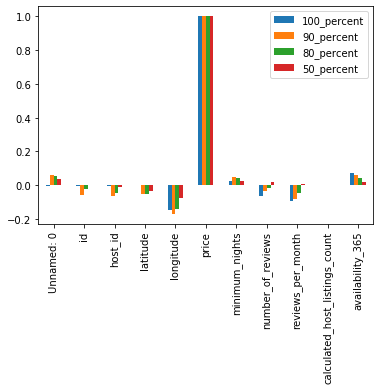

In [75]:

ax = abnb_df_corr_comparison.plot.bar()
ax.figure.savefig('price_corr_diff_percent_sample.png')

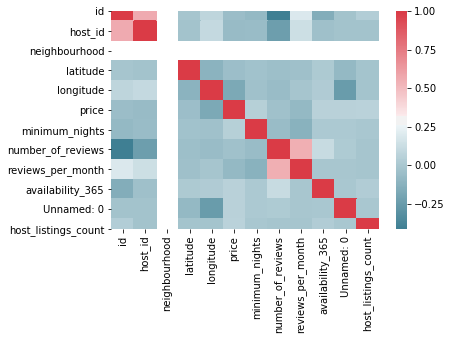

In [76]:
import seaborn as sns

ax2 = sns.heatmap(abnb_df_90_corr, xticklabels=abnb_df_90_corr.columns,
            yticklabels=abnb_df_90_corr.columns,
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

ax2.figure.savefig('price_corr90_heat_map.png')

In [77]:
# ax3 = sns.distplot(g['resp'].dropna(), color='blue', **par)

NameError: name 'g' is not defined

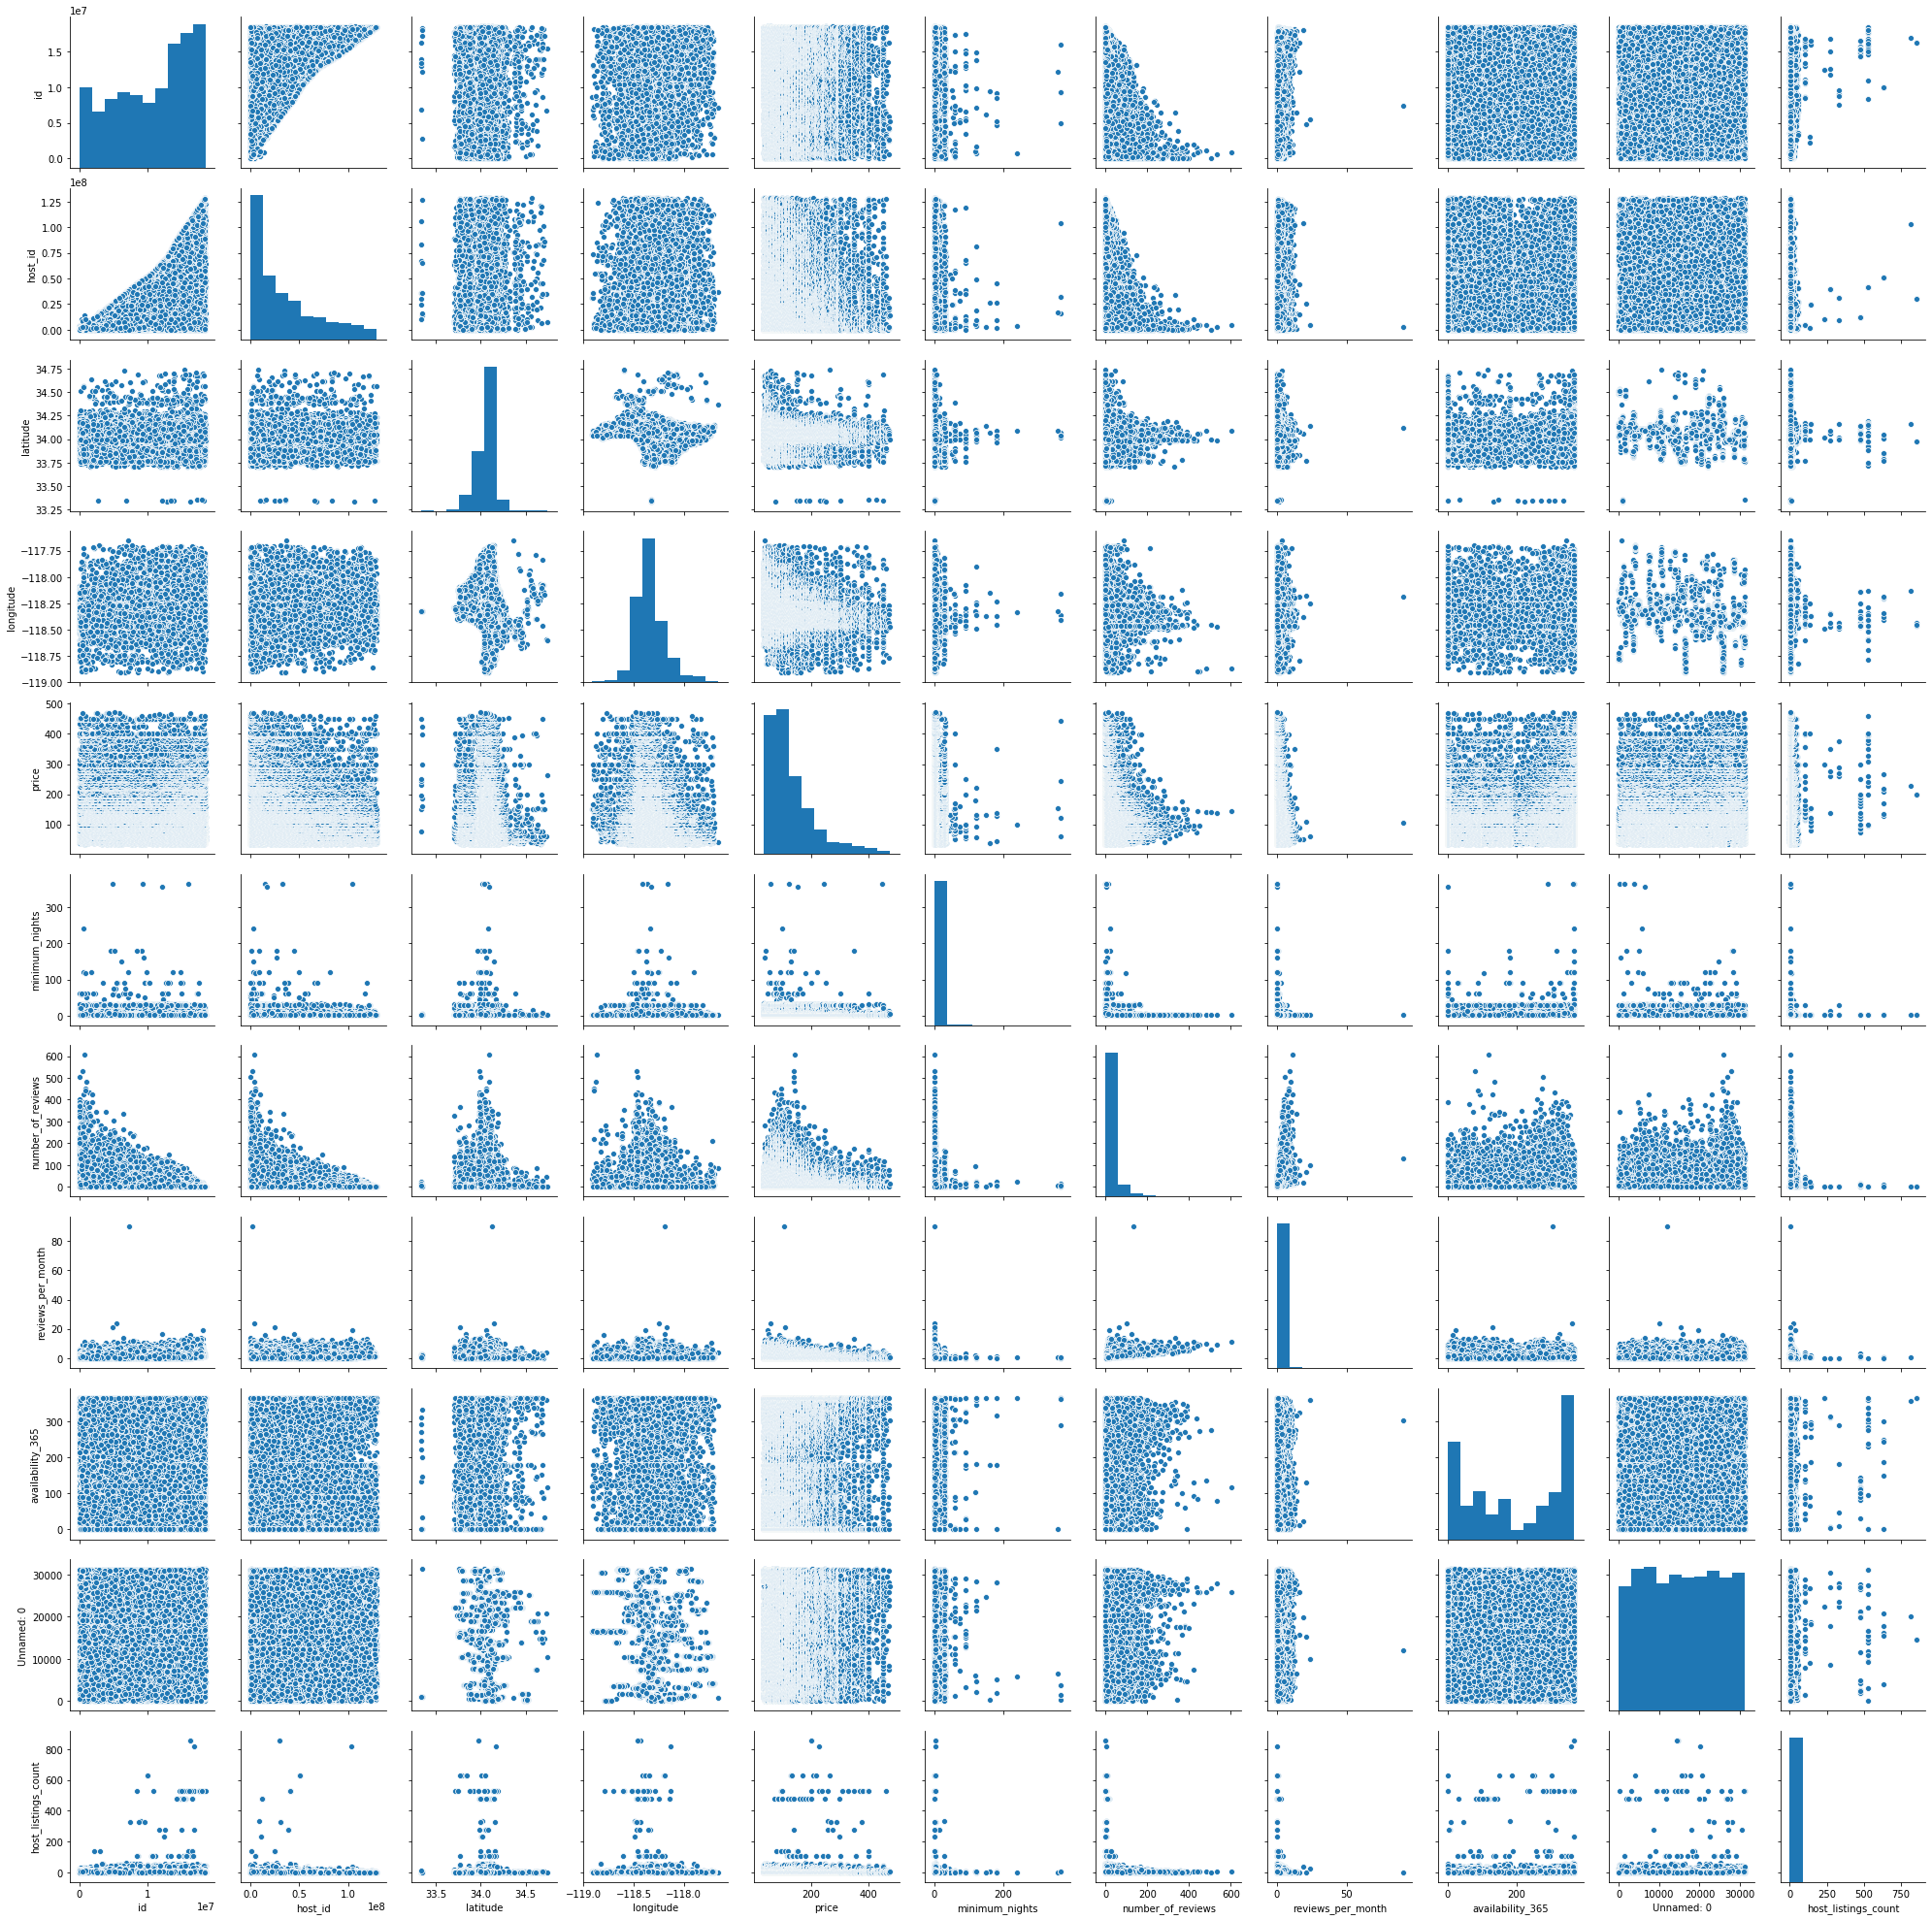

In [78]:
ax3 = sns.pairplot(abnb_df_90.iloc[np.nanmin(round(abnb_nrows*.0)):np.nanmax(round(abnb_nrows*.9))])
ax3.savefig('price_corr90_pair_plot.png')
# TO analyze everything at once for correlations quickly easily and efficiently